##Regresión lineal para aproximar la funcion logica XOR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
y= np.array([0, 1, 1, 0])

W = np.linalg.inv(X.T @ X) @ X.T @ y

print(W)

[0.00000000e+00 2.22044605e-16 5.00000000e-01]


##Implementacion de una red neuronal para aproximar la funcion logica XOR

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

In [3]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

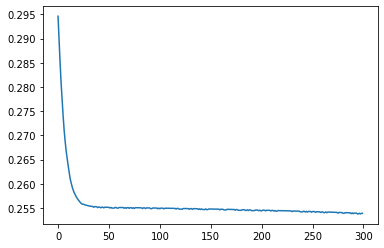

In [21]:
#SGD (Stocastic Gradient Descent)
def train_sgd(X, Y, n_epochs, alpha):

  n_samples = X.shape[0]

  # Random initialization
  w111 = np.random.uniform(0,1,size=1)
  w112 = np.random.uniform(0,1,size=1)
  b11  = np.random.uniform(0,1,size=1)
  w121 = np.random.uniform(0,1,size=1)
  w122 = np.random.uniform(0,1,size=1)
  b12  = np.random.uniform(0,1,size=1)
  w211 = np.random.uniform(0,1,size=1)
  w212 = np.random.uniform(0,1,size=1)
  b21  = np.random.uniform(0,1,size=1)

  mse = []

  for epoch in range(n_epochs):

    # Shuffle the samples
    idx = np.random.permutation(n_samples)
    X_sh = X[idx]
    Y_sh = Y[idx]

    errors = []

    for i in range(n_samples):

      x = X_sh[i]
      y = Y_sh[i]

      ### Forward
      # First layer
      z11 = w111 * x[0] + w112 * x[1] + b11
      a11 = sigmoid(z11)
      z12 = w121 * x[0] + w122 * x[1] + b12
      a12 = sigmoid(z12)
      # Second layer
      z21 = w211 * a11 + w212 * a12 + b21
      a21 = sigmoid(z21)
      # Output
      yp = a21 # > 0.5

      ### Log error
      errors.append((y - yp)**2)

      ### Backward
      # First layer
      dL_dw111 = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21)) * w211 * sigmoid(z11) * (1 - sigmoid(z11)) * x[0]
      dL_dw112 = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21)) * w211 * sigmoid(z11) * (1 - sigmoid(z11)) * x[1]
      dL_db11  = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21)) * w211 * sigmoid(z11) * (1 - sigmoid(z11))
      dL_dw121 = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21)) * w212 * sigmoid(z12) * (1 - sigmoid(z12)) * x[0]
      dL_dw122 = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21)) * w212 * sigmoid(z12) * (1 - sigmoid(z12)) * x[1]
      dL_db12  = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21)) * w212 * sigmoid(z12) * (1 - sigmoid(z12))
      # Second layer
      dL_dw211 = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21)) * a11
      dL_dw212 = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21)) * a12
      dL_db21  = -2 * (y - yp) * sigmoid(z21) * (1 - sigmoid(z21))

      ### Parameters update
      # First layer
      w111 = w111 - alpha * dL_dw111
      w112 = w112 - alpha * dL_dw112
      b11  = b11  - alpha * dL_db11
      w121 = w121 - alpha * dL_dw121
      w122 = w122 - alpha * dL_dw122
      b12  = b12  - alpha * dL_db12
      # Second layer
      w211 = w211 - alpha * dL_dw211
      w212 = w212 - alpha * dL_dw212
      b21  = b21  - alpha * dL_db21
    
    error = np.mean(errors)
    mse.append(error)

  params = [w111, w112, b11, w121, w122, b12, w211, w212, b21]
  return params, mse

params, mse = train_sgd(X, Y, n_epochs=300, alpha = 0.1)
plt.plot(mse)

In [22]:

w111, w112, b11, w121, w122, b12, w211, w212, b21 = params
def predict(x):
    # First layer
    z11 = w111 * x[0] + w112 * x[1] + b11
    a11 = sigmoid(z11)
    z12 = w121 * x[0] + w122 * x[1] + b12
    a12 = sigmoid(z12)
    # Second layer
    z21 = w211 * a11 + w212 * a12 + b21
    a21 = sigmoid(z21)
    # Output
    yp = a21 > 0.5
    return yp

In [23]:
predict([0,1])

array([ True])

##Repetir SGD n veces y extraer el mejor resultado

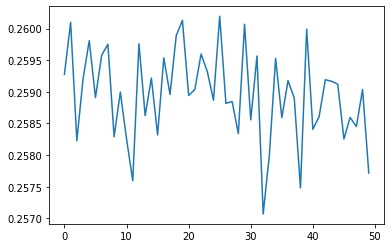

In [24]:
params, mse = train_sgd(X, Y, n_epochs=100, alpha = 0.1)

best_params = params
best_mse = mse[-1]

mses = []

for i in range(50):
  params, mse = train_sgd(X, Y, n_epochs=100, alpha = 0.15)
  mses.append(mse[-1])
  if mse[-1] < best_mse:
    best_params, best_mse = params, mse[-1]

plt.plot(mses)

In [25]:
best_mse

0.2570716618908392

In [26]:
w111, w112, b11, w121, w122, b12, w211, w212, b21 = best_params
def predict(x):
    # First layer
    z11 = w111 * x[0] + w112 * x[1] + b11
    a11 = sigmoid(z11)
    z12 = w121 * x[0] + w122 * x[1] + b12
    a12 = sigmoid(z12)
    # Second layer
    z21 = w211 * a11 + w212 * a12 + b21
    a21 = sigmoid(z21)
    # Output
    yp = a21 > 0.5
    return yp

In [27]:
predict([1,0])

array([ True])